# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import os
from glob import glob
import cv2

import sys
import random

from tqdm import tqdm

from skimage.io import imshow, imread
from skimage.transform import resize

# Data prepration

1-Training data

In [2]:
df_train = pd.read_csv('D:/Kaggle_Datasets/Amazon uderstanding/train_v2.csv')
display(df_train.head())

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


we have not lots of data, just have the filename and the corresponding tags

In [3]:
# Count of the number of tags

tags_count = pd.DataFrame(df_train['tags'].value_counts()).reset_index()
tags_count.columns = ["tags","count"]
tags_count.drop(tags_count.index[0], inplace=True)

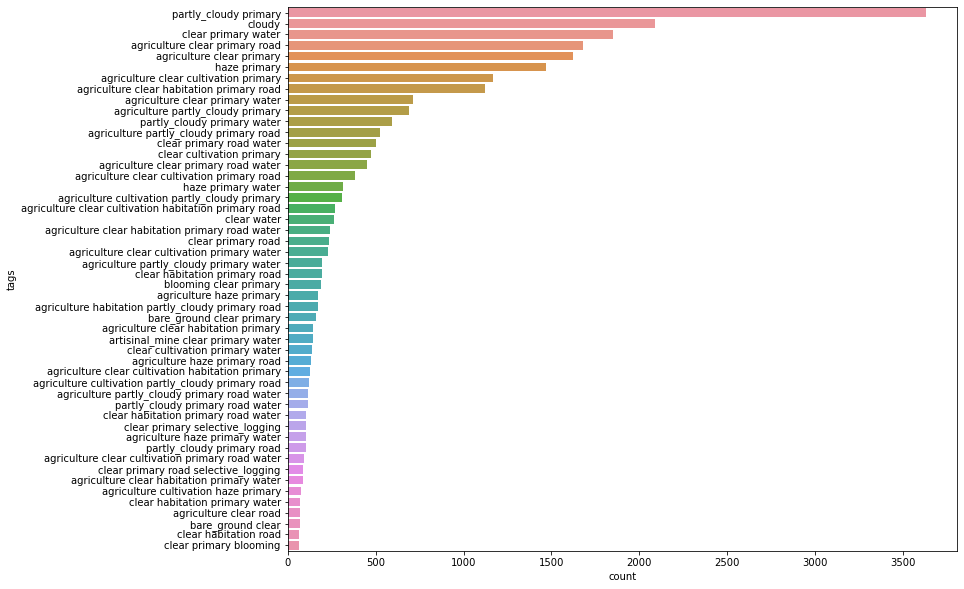

In [4]:
# Distribution of tags in plots

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(y="tags", x="count", data=tags_count.head(50), ax=ax)
plt.show()

In [5]:
# To clarify how many classifications (multilabels) there are

tags = df_train['tags'].apply(lambda x: x.split(" "))
tags_list = [i for taglist in list(tags.values) for i in taglist]
tags_list[:5]

['haze', 'primary', 'agriculture', 'clear', 'primary']

In [6]:
# Count of the number of unique tags

tags_count = pd.DataFrame({'tags': tags_list})
tags_count = tags_count.groupby('tags').size().reset_index().reset_index(drop=True)
tags_count.columns = ["tags","count"]
tags_count.to_csv('D:/Kaggle_Datasets/Amazon uderstanding/tags_count.csv')
tags_count

,tags,count
0,agriculture,12315
1,artisinal_mine,339
2,bare_ground,862
3,blooming,332
4,blow_down,101
5,clear,28431
6,cloudy,2089
7,conventional_mine,100
8,cultivation,4547
9,habitation,3660


2- Images

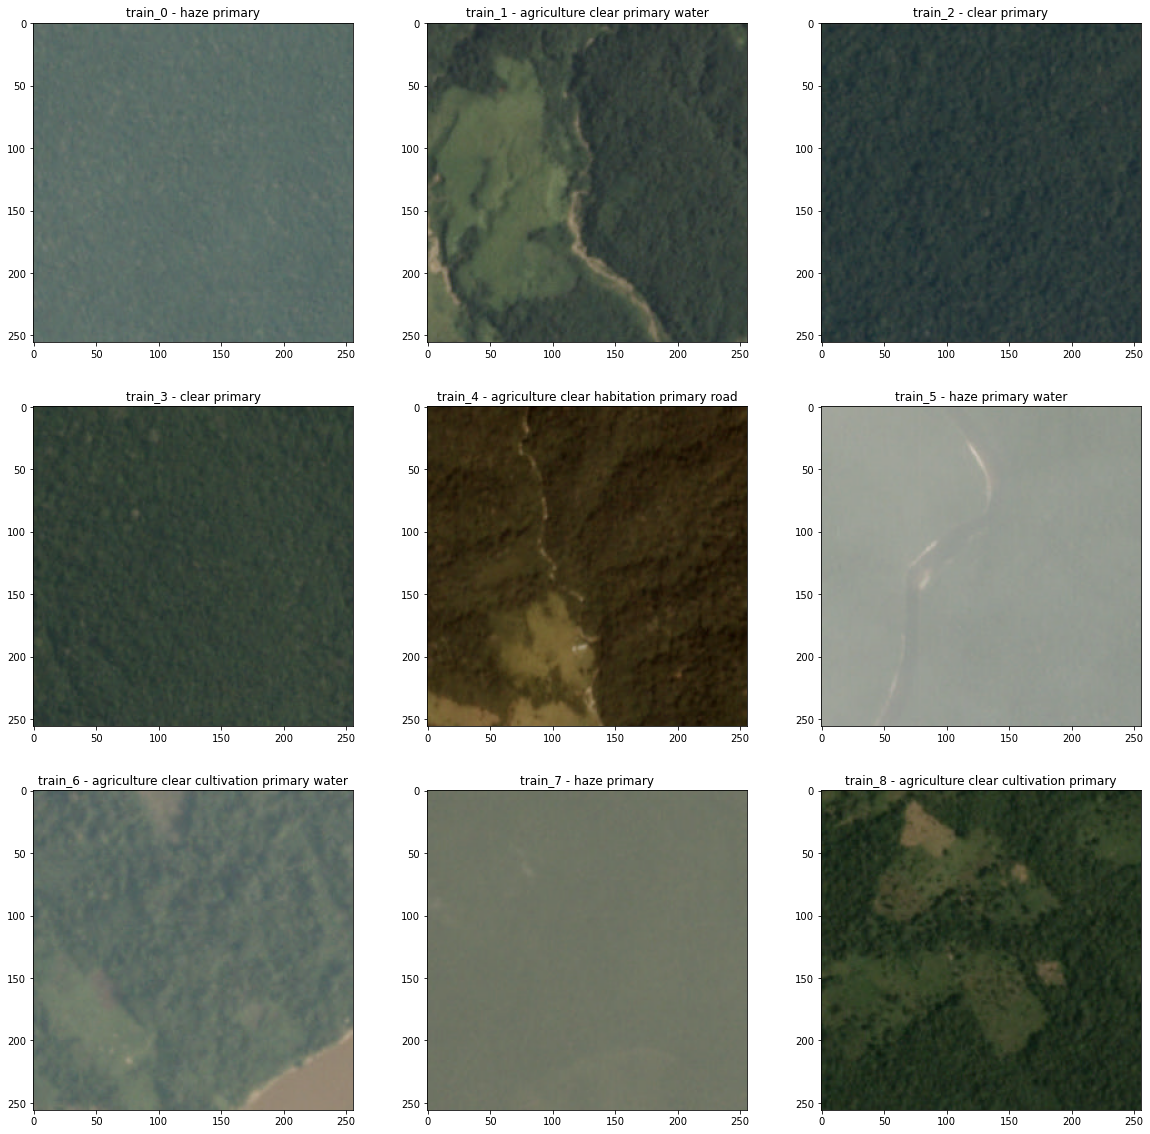

In [8]:
fig, ax = plt.subplots(3,3, figsize=(20,20))

i=0
for k, l in df_train[:9].values:
    img = cv2.imread("D:/Kaggle_Datasets/Amazon uderstanding/train-jpg/train-jpg/{}.jpg".format(k))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(k,l))
    i += 1
    
plt.show()

# Calculate dominant colours 

In [43]:
def convert_images_to_categories(image, num_colors):
    
    pixels = np.float32(image.reshape(-1,3))
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    
    _, labels, palette = cv2.kmeans(pixels, num_colors, None, criteria, 10, flags)
    square_labels = labels.reshape(256, 256, 1)
    
    dominant_convert_color = np.zeros((256, 256, 3))
    
    for row in range(256):
        for col in range(256):
            dominant_convert_color[row][col] = palette[square_labels[row][col][0]]
            
    dominant_convert_color = dominant_convert_color.round(0).astype('uint8')
    
    return dominant_convert_color

In [54]:
def show_img(img):
    if img.shape == (256,256,3):
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    plt.show()

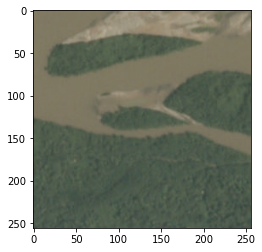

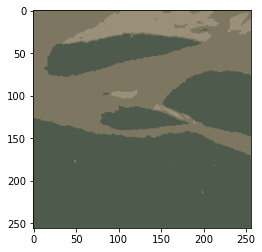

In [57]:
path_img = 'D:/Kaggle_Datasets/Amazon uderstanding/train-jpg/train-jpg/train_170.jpg'
img = cv2.imread(path_img)

show_img(img)
show_img(convert_images_to_categories(img, num_colors = 3))